# Benchmarking

In [1]:
import sys
import time
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from functools import partial
# sys.path.append('/Users/calum/Developer/pyzx-heuristics-master')
# import pyzx as zx_heuristics
sys.path.append('..')
import pyzx as zx
from benchmarking import benchmark

In [2]:
b = benchmark(dirpath='benchmark_int')
# b = benchmark()
# b.load_circuits(os.path.join('..', 'circuits', 'benchmarking', 'Fast', 'before'), group_name='fast')
# b.load_circuits(os.path.join('..', 'circuits', 'benchmarking', 'Fast', 'nrscm'), group_name='fast', simp_strategy='NRSCM')
b.show_attributes()

Circuit attributes:  ['Qubits', 'Gates', '2Q Count', 'T Count', 't_simp', 't_opt']
Loaded functions:  ['basic', 'full_reduce', 'int', 'int_flow', 'nu_flow', 'int_nu_flow', 'int_nu', 'int_nu_2', 'zx_heur', 'zx_heur_nu']
Loaded routines:  ['NRSCM']
Loaded circuit groups:  ['fast']


,Original,NRSCM,basic,full_reduce,int,int_flow,int_nu,int_nu_2,int_nu_flow,nu_flow,zx_heur,zx_heur_nu
fast,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y


In [4]:
def basic(c):
    c1 = zx.optimize.basic_optimization(c.copy(), do_swaps=False).to_basic_gates()
    c2 = zx.optimize.basic_optimization(c.copy(), do_swaps=True).to_basic_gates()
    if c2.twoqubitcount() < c1.twoqubitcount(): return c2
    return c1

def full_reduce(c):
    g = c.to_graph()
    zx.simplify.full_reduce(g,quiet=True)
    c2 = zx.extract_circuit(g,up_to_perm=False).to_basic_gates()
    c3 = zx.optimize.basic_optimization(c2.copy(), do_swaps=False).to_basic_gates()
    c4 = zx.optimize.basic_optimization(c2.copy(), do_swaps=True).to_basic_gates()
    if c4.twoqubitcount() < c3.twoqubitcount(): return c4
    return c3

def int_cliff_lim(c):
    t0 = time.time()
    g = c.to_graph()
    zx.simplify.to_gh(g)
    g2 = zx.simplify.flow_reduce_2(g,x=None, flow='g',quiet=True)
    t1 = time.time()
    c2 = zx.extract.extract_circuit(g2, up_to_perm=False).to_basic_gates()
    c3 = zx.optimize.basic_optimization(c2.copy(), do_swaps=False).to_basic_gates()
    c4 = zx.optimize.basic_optimization(c2.copy(), do_swaps=True).to_basic_gates()
    t2 = time.time()
    if c4.twoqubitcount() < c3.twoqubitcount(): return c4, t1-t0, t2-t0
    return c3, t1-t0, t2-t0

def int_cliff_lim_flow(c):
    t0 = time.time()
    g = c.to_graph()
    zx.simplify.to_gh(g)
    g2 = zx.simplify.flow_reduce_2(g,x=None,quiet=True)
    t1 = time.time()
    c2 = zx.extract.extract_simple(g2, up_to_perm=False).to_basic_gates()
    c3 = zx.optimize.basic_optimization(c2.copy(), do_swaps=False).to_basic_gates()
    c4 = zx.optimize.basic_optimization(c2.copy(), do_swaps=True).to_basic_gates()
    t2 = time.time()
    if c4.twoqubitcount() < c3.twoqubitcount(): return c4, t1-t0, t2-t0
    return c3, t1-t0, t2-t0

def nu(c):
    t0 = time.time()
    g = c.to_graph()
    zx.simplify.to_gh(g)
    g2 = zx.simplify.flow_reduce(g,x=[1,1,1,0,0,0,0,0,0], flow='g',quiet=True)
    t1 = time.time()
    c2 = zx.extract.extract_circuit(g2, up_to_perm=False).to_basic_gates()
    c3 = zx.optimize.basic_optimization(c2.copy(), do_swaps=False).to_basic_gates()
    c4 = zx.optimize.basic_optimization(c2.copy(), do_swaps=True).to_basic_gates()
    t2 = time.time()
    if c4.twoqubitcount() < c3.twoqubitcount(): return c4, t1-t0, t2-t0
    return c3, t1-t0, t2-t0

def nu_flow(c):
    t0 = time.time()
    g = c.to_graph()
    zx.simplify.to_gh(g)
    g2 = zx.simplify.flow_reduce(g,x=[1,1,1,0,0,0,0,0,0], flow='causal',quiet=True)
    t1 = time.time()
    c2 = zx.extract.extract_simple(g2, up_to_perm=False).to_basic_gates()
    c3 = zx.optimize.basic_optimization(c2.copy(), do_swaps=False).to_basic_gates()
    c4 = zx.optimize.basic_optimization(c2.copy(), do_swaps=True).to_basic_gates()
    t2 = time.time()
    if c4.twoqubitcount() < c3.twoqubitcount(): return c4, t1-t0, t2-t0
    return c3, t1-t0, t2-t0

def int_cliff_nu_flow(c):
    t0 = time.time()
    g = c.to_graph()
    zx.simplify.to_gh(g)
    g2 = zx.simplify.flow_reduce_2(g,x=None,quiet=True)
    g4 = zx.simplify.flow_reduce(g2,x=[1,1,1,0,0,0,0,0,0], flow='causal',quiet=True)
    t1 = time.time()
    c2 = zx.extract.extract_simple(g4, up_to_perm=False).to_basic_gates()
    c3 = zx.optimize.basic_optimization(c2.copy(), do_swaps=False).to_basic_gates()
    c4 = zx.optimize.basic_optimization(c2.copy(), do_swaps=True).to_basic_gates()
    t2 = time.time()
    if c4.twoqubitcount() < c3.twoqubitcount(): return c4, t1-t0, t2-t0
    return c3, t1-t0, t2-t0

def int_cliff_nu(c):
    t0 = time.time()
    g = c.to_graph()
    zx.simplify.to_gh(g)
    g2 = zx.simplify.flow_reduce_2(g,x=None, flow='g',quiet=True)
    c2 = zx.extract.extract_circuit(g2, up_to_perm=False).to_basic_gates()
    g3 = c2.to_graph()
    g4 = zx.simplify.flow_reduce(g3,x=[1,1,1,0,0,0,0,0,0], flow='causal',quiet=True)
    t1 = time.time()
    c2 = zx.extract.extract_simple(g4, up_to_perm=False).to_basic_gates()
    c3 = zx.optimize.basic_optimization(c2.copy(), do_swaps=False).to_basic_gates()
    c4 = zx.optimize.basic_optimization(c2.copy(), do_swaps=True).to_basic_gates()
    t2 = time.time()
    if c4.twoqubitcount() < c3.twoqubitcount(): return c4, t1-t0, t2-t0
    return c3, t1-t0, t2-t0

def int_cliff_nu_2(c):
    t0 = time.time()
    g = c.to_graph()
    zx.simplify.to_gh(g)
    g2 = zx.simplify.flow_reduce_2(g,x=None, flow='g',quiet=True)
    c2 = zx.extract.extract_circuit(g2, up_to_perm=False).to_basic_gates()
    c3 = zx.optimize.basic_optimization(c2.copy(), do_swaps=False).to_basic_gates()
    c4 = zx.optimize.basic_optimization(c2.copy(), do_swaps=True).to_basic_gates()
    if c4.twoqubitcount() < c3.twoqubitcount(): g3 = c4.to_graph()
    else: g3 = c3.to_graph()
    zx.simplify.to_gh(g3)
    g4 = zx.simplify.flow_reduce(g3,x=[1,1,1,0,0,0,0,0,0], flow='causal',quiet=True)
    t1 = time.time()
    c5 = zx.extract.extract_simple(g4, up_to_perm=False).to_basic_gates()
    c6 = zx.optimize.basic_optimization(c5.copy(), do_swaps=False).to_basic_gates()
    c7 = zx.optimize.basic_optimization(c5.copy(), do_swaps=True).to_basic_gates()
    t2 = time.time()
    if c7.twoqubitcount() < c6.twoqubitcount(): return c7, t1-t0, t2-t0
    return c6, t1-t0, t2-t0

def zx_heur(c):
    t0 = time.time()
    g = c.to_graph()
    g = zx_heuristics.simplify.teleport_reduce(g)
    g.track_phases = False
    zx_heuristics.simplify.greedy_simp(g)
    t1 = time.time()
    c2 = zx_heuristics.extract_circuit(g, up_to_perm=False).to_basic_gates()
    c3 = zx_heuristics.optimize.basic_optimization(c2.copy(), do_swaps=False).to_basic_gates()
    c4 = zx_heuristics.optimize.basic_optimization(c2.copy(), do_swaps=True).to_basic_gates()
    t2 = time.time()
    if c4.twoqubitcount() < c3.twoqubitcount(): return c4, t1-t0, t2-t0
    return c3, t1-t0, t2-t0

def zx_heur_nu(c):
    t0 = time.time()
    g = c.to_graph()
    g = zx_heuristics.simplify.teleport_reduce(g)
    g.track_phases = False
    zx_heuristics.simplify.greedy_simp_neighbors(g)
    t1 = time.time()
    c2 = zx_heuristics.extract_circuit(g, up_to_perm=False).to_basic_gates()
    c3 = zx_heuristics.optimize.basic_optimization(c2.copy(), do_swaps=False).to_basic_gates()
    c4 = zx_heuristics.optimize.basic_optimization(c2.copy(), do_swaps=True).to_basic_gates()
    t2 = time.time()
    if c4.twoqubitcount() < c3.twoqubitcount(): return c4, t1-t0, t2-t0
    return c3, t1-t0, t2-t0

In [5]:
b.add_simplification_func(basic, 'basic', groups_to_run=['fast'],verify=True)
b.add_simplification_func(full_reduce, 'full_reduce', groups_to_run=['fast'],verify=True)
b.add_simplification_func(int_cliff_lim, 'int', groups_to_run=['fast'],verify=True)
b.add_simplification_func(int_cliff_lim_flow, 'int_flow', groups_to_run=['fast'],verify=True)
b.add_simplification_func(nu_flow, 'nu_flow', groups_to_run=['fast'],verify=True)
b.add_simplification_func(int_cliff_nu_flow, 'int_nu_flow', groups_to_run=['fast'],verify=True)
b.add_simplification_func(int_cliff_nu, 'int_nu', groups_to_run=['fast'],verify=True)
b.add_simplification_func(int_cliff_nu_2, 'int_nu_2', groups_to_run=['fast'],verify=True)
b.add_simplification_func(zx_heur, 'zx_heur', groups_to_run=['fast'],verify=True,rerun=True)
b.add_simplification_func(zx_heur_nu, 'zx_heur_nu', groups_to_run=['fast'],verify=True,rerun=True)

100%|██████████| 32/32 [00:00<00:00, 173184.17it/s]
Processing zx_heur on tof_3                                           :   0%|          | 0/32 [00:00<?, ?it/s]

NameError: name 'zx_heuristics' is not defined

In [6]:
b.show_attributes()

Circuit attributes:  ['Qubits', 'Gates', '2Q Count', 'T Count', 't_simp', 't_opt']
Loaded functions:  ['basic', 'full_reduce', 'int', 'int_flow', 'nu_flow', 'int_nu_flow', 'int_nu', 'int_nu_2', 'zx_heur', 'zx_heur_nu']
Loaded routines:  ['NRSCM']
Loaded circuit groups:  ['fast']


,Original,NRSCM,basic,full_reduce,int,int_flow,int_nu,int_nu_2,int_nu_flow,nu_flow,zx_heur,zx_heur_nu
fast,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y


In [10]:
df = b.df(groups=['fast'],
     routines='all',
     funcs=['basic','zx_heur', 'zx_heur_nu', 'int', 'int_nu', 'int_nu_2', 'int_flow', 'nu_flow', 'int_nu_flow'],
     atts=['Qubits', 'Gates','2Q Count','T Count','t_opt'])

100%|██████████| 11/11 [00:01<00:00,  7.28it/s]


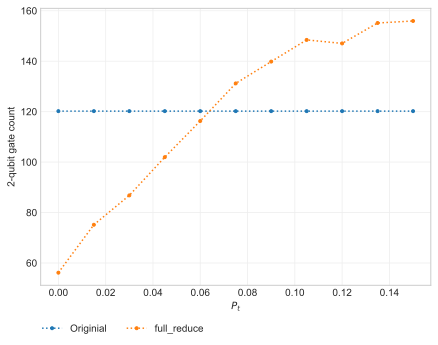

In [21]:
funcs = ['full_reduce']
# , 'int', 'int_flow', 'int_nu_flow', 'int_nu'
t_probs = [0.015*i for i in range(11)]
fig = b.Pt_graphs(funcs=funcs, qubits=8, depth=400, cnot_prob=0.3, t_probs=t_probs, ys=['2Q Count'], reps=20, overwrite=False, random_seed=42)

Processing zx_heur_nu on P_t = 0.0                :   0%|          | 0/11 [00:00<?, ?it/s]

Processing zx_heur_nu on P_t = 0.15               : 100%|██████████| 11/11 [1:00:48<00:00, 331.66s/it]


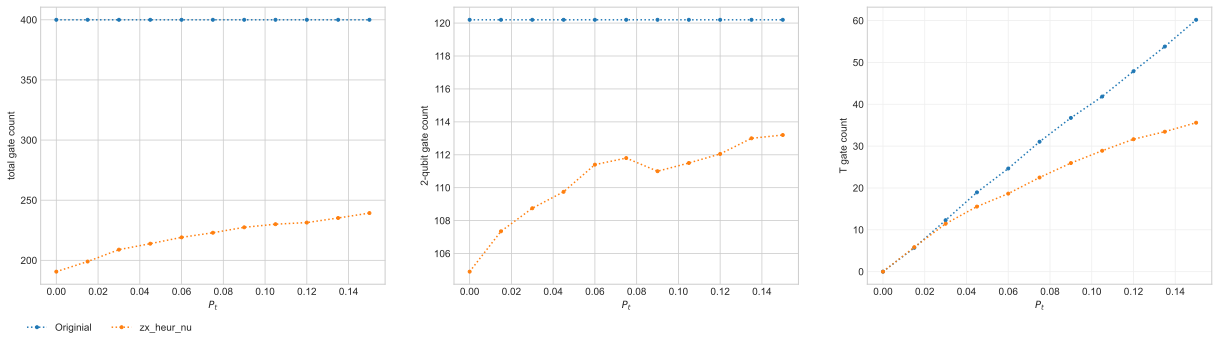

In [6]:
funcs = ['zx_heur_nu']
t_probs = [0.015*i for i in range(11)]
fig = b.Pt_graphs(funcs=funcs, qubits=8, depth=400, cnot_prob=0.3, t_probs=t_probs, ys=['Gates','2Q Count','T Count'], reps=20, overwrite=False, random_seed=42)
# , 'zx_heur', 'zx_heur_nu'

In [7]:
b.save(dirpath='benchmark_int')